In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy 
from scipy.stats import spearmanr
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter


# Gathering the data

In [16]:
df = pd.read_csv("diabetes_012.csv")
df['Diabetes_012'].replace({2.0:1.0}, inplace = True)

# Checking correlation with all features
Diabetes = df['Diabetes_012']


##Binarizing

####################THIS IS WHERE YOU CHANGE THE THRESHOLD##################################
#df['Age'] = np.where(df['Age'].between(1,10), 0, df['Age']) #Between and including 1 and 6
#df['Age'] = np.where(df['Age'].between(11,13), 1, df['Age']) #Between and including 7 and 13
############################################################################################

#df['BMI'] = np.where(df['BMI'].between(0,19), 0, df['BMI']) #  Under Weight
#df['BMI'] = np.where(df['BMI'].between(20,24), 1, df['BMI']) # Healthy BMI 
#df['BMI'] = np.where(df['BMI'].between(25,100), 2, df['BMI'])#  OverWeight

## FOR FEATURE SELECTION
#df = df[['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income', 'Diabetes_012']]

df.sample(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
10938,1.0,1.0,0.0,1.0,34.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,30.0,10.0,1.0,1.0,10.0,4.0,6.0
75711,0.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,5.0,6.0,8.0
220612,0.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,4.0,7.0
218249,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,4.0,4.0
212022,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,5.0,3.0
62220,0.0,0.0,0.0,1.0,39.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,3.0,7.0,1.0,1.0,0.0,7.0,4.0,4.0
151067,0.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,7.0
221001,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,12.0,6.0,4.0
37015,0.0,1.0,0.0,1.0,33.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,13.0,5.0,5.0
211921,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,1.0,1.0,7.0,4.0,6.0


# Analyzing Correlations

In [17]:
#Every single column is in this array
column_array = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
all_correlations = []
for i in range (len(column_array)):
    current_index = df[column_array[i]]
    spearmanr_coefficient, p_value = spearmanr(Diabetes, current_index)
    all_correlations.append([column_array[i], spearmanr_coefficient])

all_correlations.sort(key = lambda all_correlations : all_correlations[1], reverse = True)
print("CORRELATION RANKING WITH DIABETES DESCENDING ORDER:")
for i in range(len(all_correlations)):
    print("For " + str(all_correlations[i][0]) + ', correlation with diabetes: ' + str(all_correlations[i][1]))

CORRELATION RANKING WITH DIABETES DESCENDING ORDER:
For GenHlth, correlation with diabetes: 0.2956965223503244
For HighBP, correlation with diabetes: 0.27033413782823484
For BMI, correlation with diabetes: 0.23510351924420628
For DiffWalk, correlation with diabetes: 0.22215489287386767
For HighChol, correlation with diabetes: 0.21028966430760263
For Age, correlation with diabetes: 0.18593152591388212
For HeartDiseaseorAttack, correlation with diabetes: 0.1769333102390056
For PhysHlth, correlation with diabetes: 0.16090340865912747
For Stroke, correlation with diabetes: 0.10479969968291783
For CholCheck, correlation with diabetes: 0.06787859992199813
For Smoker, correlation with diabetes: 0.06277765755767814
For MentHlth, correlation with diabetes: 0.0453028748117598
For NoDocbcCost, correlation with diabetes: 0.03802546722845298
For Sex, correlation with diabetes: 0.029605612331244643
For AnyHealthcare, correlation with diabetes: 0.014079229503665023
For Fruits, correlation with diabet

# Plotting the correlation

Text(0, 0.5, 'Correlation Number Value')

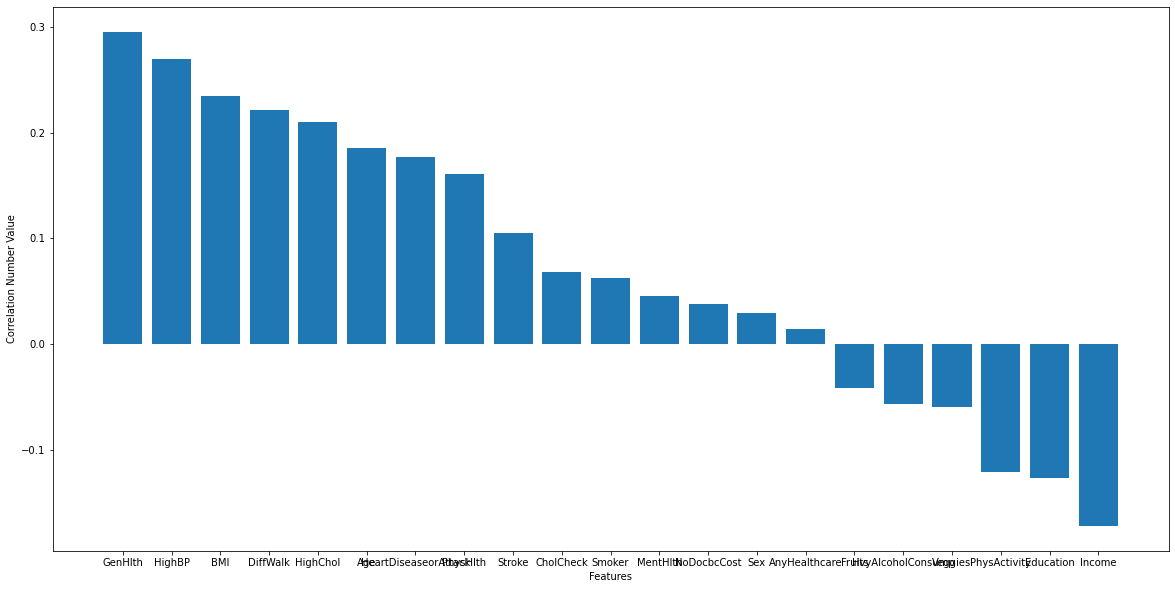

In [18]:
x = []
y = []
for i in range(len(all_correlations)):
    x.append(all_correlations[i][0])
    y.append(all_correlations[i][1])

plt.figure(figsize = (20,10))
plt.bar(x,y)
plt.xlabel("Features")
plt.ylabel("Correlation Number Value")


<AxesSubplot:>

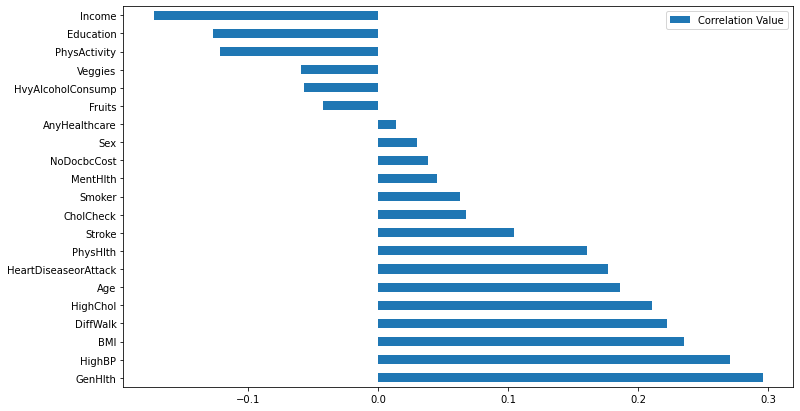

In [19]:
plotdata = pd.DataFrame(
    {"Correlation Value": y}, 
    index=x)
# Plot a bar chart
plotdata.plot(kind="barh", figsize = (12,7))

# Splitting the data

In [20]:
#Splitting into train then test set
x_train, x_test, y_train, y_test = train_test_split(df.drop('Diabetes_012', axis = 1), df['Diabetes_012'], test_size = 0.15)
#Splitting into train, validation, then test
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.15)

# Not applying any balancing method

In [21]:
LogReg = LogisticRegression(max_iter=1000).fit(x_tr, y_tr)
print("Logistic Regression score: %" + str(round((LogReg.score(x_val,y_val)) * 100 , 2)))

Logistic Regression score: %85.04


In [22]:
y_predict = LogReg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     32101
         1.0       0.55      0.19      0.28      5951

    accuracy                           0.85     38052
   macro avg       0.71      0.58      0.60     38052
weighted avg       0.82      0.85      0.82     38052



In [23]:
print(confusion_matrix(y_test, y_predict))

[[31181   920]
 [ 4839  1112]]


In [24]:
#[ True Negative False positive] 
#[ False Negative True Positive ]
array = (confusion_matrix(y_test, y_predict))
print ("The amount of True Positives are: " + str(array[1][1]))
print ("The amount of True Negatives are: " + str(array[0][0]))

The amount of True Positives are: 1112
The amount of True Negatives are: 31181


# Applying balance_weight = balanced

In [25]:
# Training the model 
LogReg = LogisticRegression(class_weight = "balanced", max_iter=1000).fit(x_tr, y_tr)

print("Logistic Regression score: %" + str(round((LogReg.score(x_val,y_val)) * 100 , 2)))

Logistic Regression score: %73.2


In [26]:
y_predict = LogReg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     32101
         1.0       0.34      0.77      0.47      5951

    accuracy                           0.73     38052
   macro avg       0.64      0.74      0.64     38052
weighted avg       0.85      0.73      0.76     38052



In [27]:
print(confusion_matrix(y_test, y_predict))

[[23094  9007]
 [ 1378  4573]]


In [28]:
#[ True Negative False positive] 
#[ False Negative True Positive ]
array = (confusion_matrix(y_test, y_predict))
print ("The amount of True Positives are: " + str(array[1][1]))
print ("The amount of True Negatives are: " + str(array[0][0]))

The amount of True Positives are: 4573
The amount of True Negatives are: 23094


# Applying Oversampling

In [29]:
X = x_tr # Dataframe with all columnns but Diabetes column
Y = y_tr # Dataframe with only Diabetes column
ros = RandomOverSampler(random_state = 0)
x_resample, y_resample = ros.fit_resample(X,Y)
print(sorted(Counter(y_resample).items()), y_resample.shape)


[(0.0, 154312), (1.0, 154312)] (308624,)


In [30]:
LogReg = LogisticRegression(max_iter=1000).fit(x_resample, y_resample)
print("Logistic Regression score: %" + str(round((LogReg.score(x_val,y_val)) * 100 , 2)))

Logistic Regression score: %73.19


In [31]:
y_predict = LogReg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     32101
         1.0       0.34      0.77      0.47      5951

    accuracy                           0.73     38052
   macro avg       0.64      0.74      0.64     38052
weighted avg       0.85      0.73      0.76     38052



In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[23062  9039]
 [ 1376  4575]]


In [33]:
#[ True Negative False positive] 
#[ False Negative True Positive ]
array = (confusion_matrix(y_test, y_predict))
print ("The amount of True Positives are: " + str(array[1][1]))
print ("The amount of True Negatives are: " + str(array[0][0]))

The amount of True Positives are: 4575
The amount of True Negatives are: 23062


# Applying Undersampling

In [34]:
rus = RandomUnderSampler(random_state = 0)
x_undersample, y_undersample = rus.fit_resample(X,Y)
#Checking size 
print(sorted(Counter(y_undersample).items()), y_undersample.shape)

[(0.0, 28971), (1.0, 28971)] (57942,)


In [35]:
LogReg = LogisticRegression(max_iter=1000).fit(x_undersample, y_undersample)

print("Logistic Regression score: %" + str(round((LogReg.score(x_val,y_val)) * 100 , 2)))

Logistic Regression score: %73.14


In [36]:
y_predict = LogReg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     32101
         1.0       0.34      0.77      0.47      5951

    accuracy                           0.73     38052
   macro avg       0.64      0.74      0.64     38052
weighted avg       0.85      0.73      0.76     38052



In [37]:
print(confusion_matrix(y_test, y_predict))

[[23033  9068]
 [ 1372  4579]]


In [38]:
#[ True Negative False positive] 
#[ False Negative True Positive ]
array = (confusion_matrix(y_test, y_predict))
print ("The amount of True Positives are: " + str(array[1][1]))
print ("The amount of True Negatives are: " + str(array[0][0]))

The amount of True Positives are: 4579
The amount of True Negatives are: 23033


# Applying SMOTE 

In [39]:
smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 15)
X_resampling, Y_resampling = smote.fit_resample(X,Y)
Y_resampling.value_counts()

0.0    154312
1.0    154312
Name: Diabetes_012, dtype: int64

In [40]:
LogReg = LogisticRegression(max_iter=1000).fit(X_resampling,Y_resampling)
print("Logistic Regression score: %" + str(round((LogReg.score(x_val,y_val)) * 100 , 2)))

Logistic Regression score: %73.23


In [41]:
y_predict = LogReg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     32101
         1.0       0.34      0.77      0.47      5951

    accuracy                           0.73     38052
   macro avg       0.64      0.74      0.64     38052
weighted avg       0.85      0.73      0.76     38052



In [42]:
print(confusion_matrix(y_test, y_predict))

[[23078  9023]
 [ 1397  4554]]


In [43]:
#[ True Negative False positive] 
#[ False Negative True Positive ]
array = (confusion_matrix(y_test, y_predict))
print ("The amount of True Positives are: " + str(array[1][1]))
print ("The amount of True Negatives are: " + str(array[0][0]))

The amount of True Positives are: 4554
The amount of True Negatives are: 23078
